## EDA

In [12]:
import os
import fnmatch
from music21 import converter, note, chord, key, meter
from collections import Counter
from miditoolkit import MidiFile
import matplotlib.pyplot as plt
from glob import glob

def get_jigs_files(folder):
    return [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if fnmatch.fnmatch(f, "jigs*.mid")
    ]


In [2]:
# === Analyze key signatures and time signatures ===
def analyze_keys(jigs_files):
    key_counts = Counter()
    
    for path in jigs_files:
        try:
            score = converter.parse(path)
            score_key = score.analyze('key')
            
            key_counts[str(score_key)] += 1
            
        except Exception as e:
            print(f"Error reading {path}: {e}")
    
    return key_counts

In [3]:
# === Analyze pitch range (min and max) ===
def analyze_pitch_range(jigs_files):
    lowest = 127
    highest = 0
    
    for path in jigs_files:
        try:
            score = converter.parse(path)
            notes = score.recurse().notes
            
            for n in notes:
                if isinstance(n, note.Note):
                    pitch_val = n.pitch.midi
                    lowest = min(lowest, pitch_val)
                    highest = max(highest, pitch_val)
                elif isinstance(n, chord.Chord):
                    for p in n.pitches:
                        pitch_val = p.midi
                        lowest = min(lowest, pitch_val)
                        highest = max(highest, pitch_val)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    
    return lowest, highest

In [4]:
# === Plot helper ===
def plot_counter(counter, title, xlabel, ylabel, top_n=10):
    items = counter.most_common(top_n)
    labels, values = zip(*items)
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Found 340 jigs MIDI files.

Most Common Keys:
  D major: 97 files
  G major: 94 files
  A major: 40 files
  e minor: 33 files
  a minor: 22 files

 Pitch Range (MIDI): 55 to 86


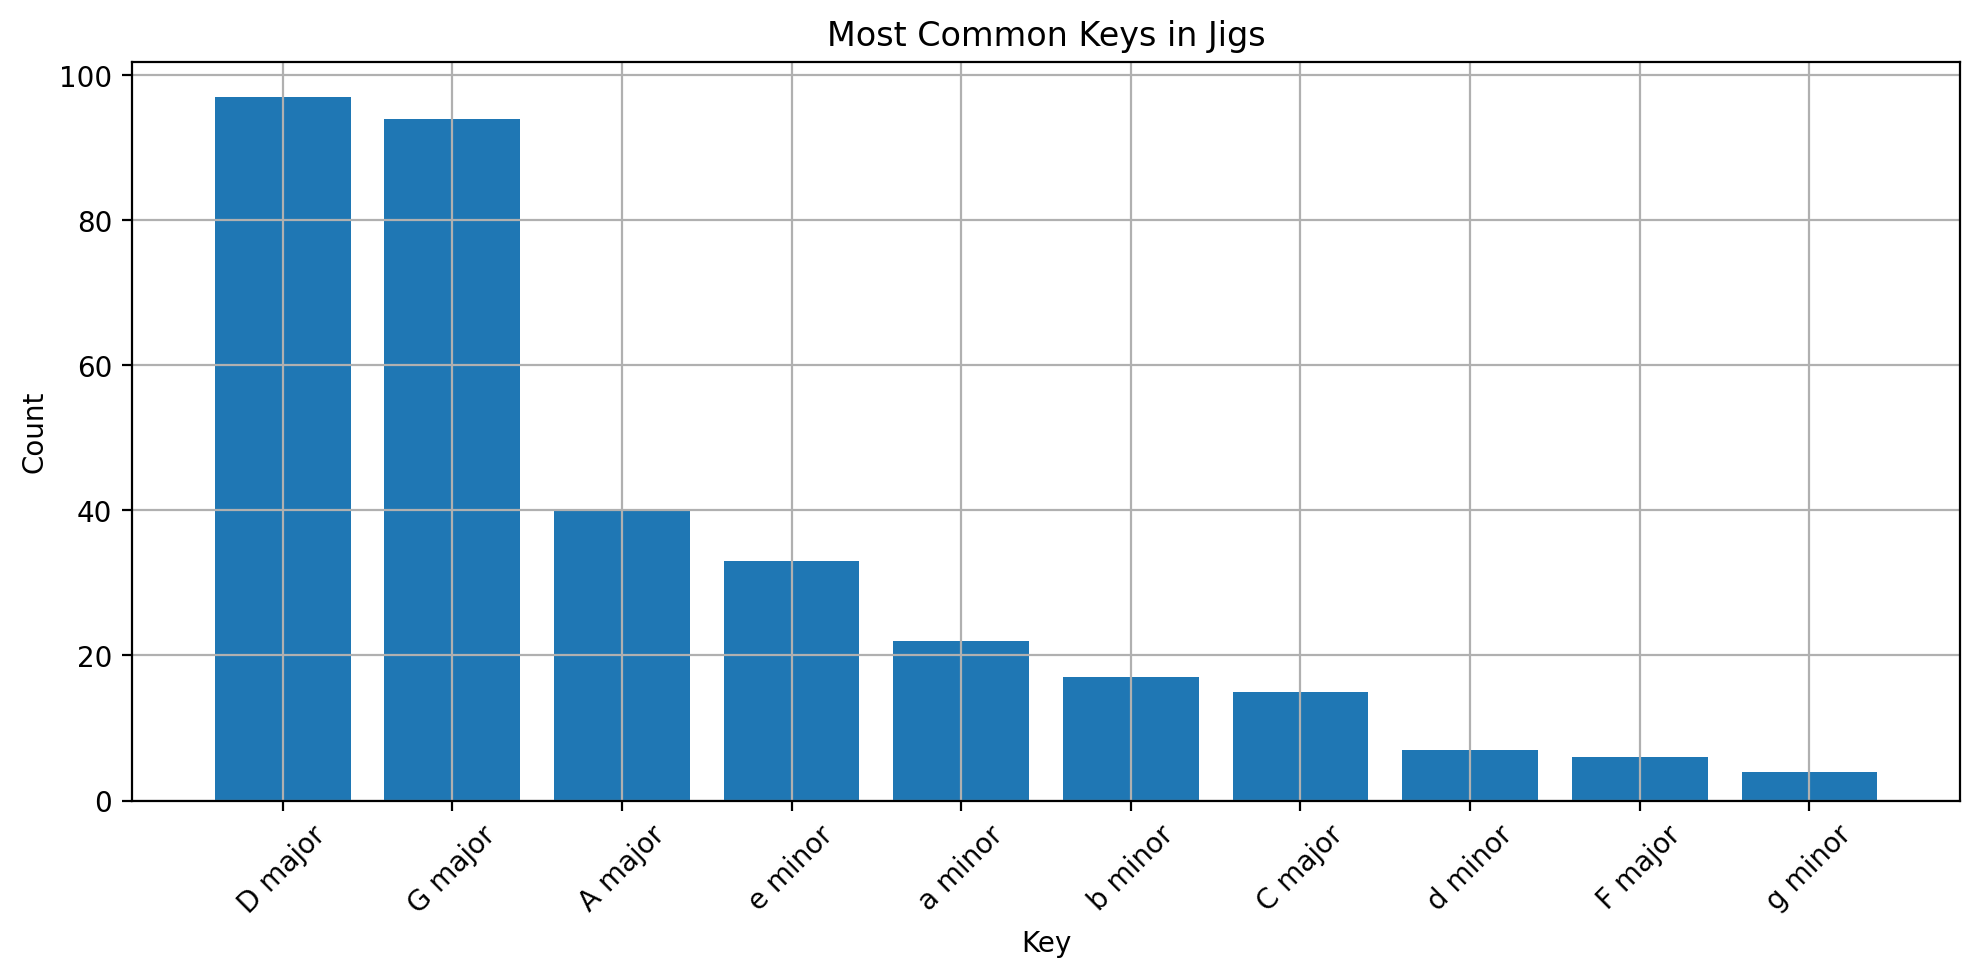

In [5]:
# === Main Execution ===
if __name__ == "__main__":
    midi_dir = "MIDI/melody"  # Change this to your path
    jigs_files = get_jigs_files(midi_dir)
    
    print(f"Found {len(jigs_files)} jigs MIDI files.\n")
    
    # Key and Time Signature Analysis
    key_counts = analyze_keys(jigs_files)
    
    print("Most Common Keys:")
    for k, v in key_counts.most_common(5):
        print(f"  {k}: {v} files")

    # Pitch Range
    lowest, highest = analyze_pitch_range(jigs_files)
    print(f"\n Pitch Range (MIDI): {lowest} to {highest}")
    
    # Visualizations
    plot_counter(key_counts, "Most Common Keys in Jigs", "Key", "Count")


Found 1034 jigs MIDI files.

Most Common Keys:
  D major: 318 files
  G major: 297 files
  A major: 120 files
  e minor: 97 files
  a minor: 50 files

 Pitch Range (MIDI): 55 to 88


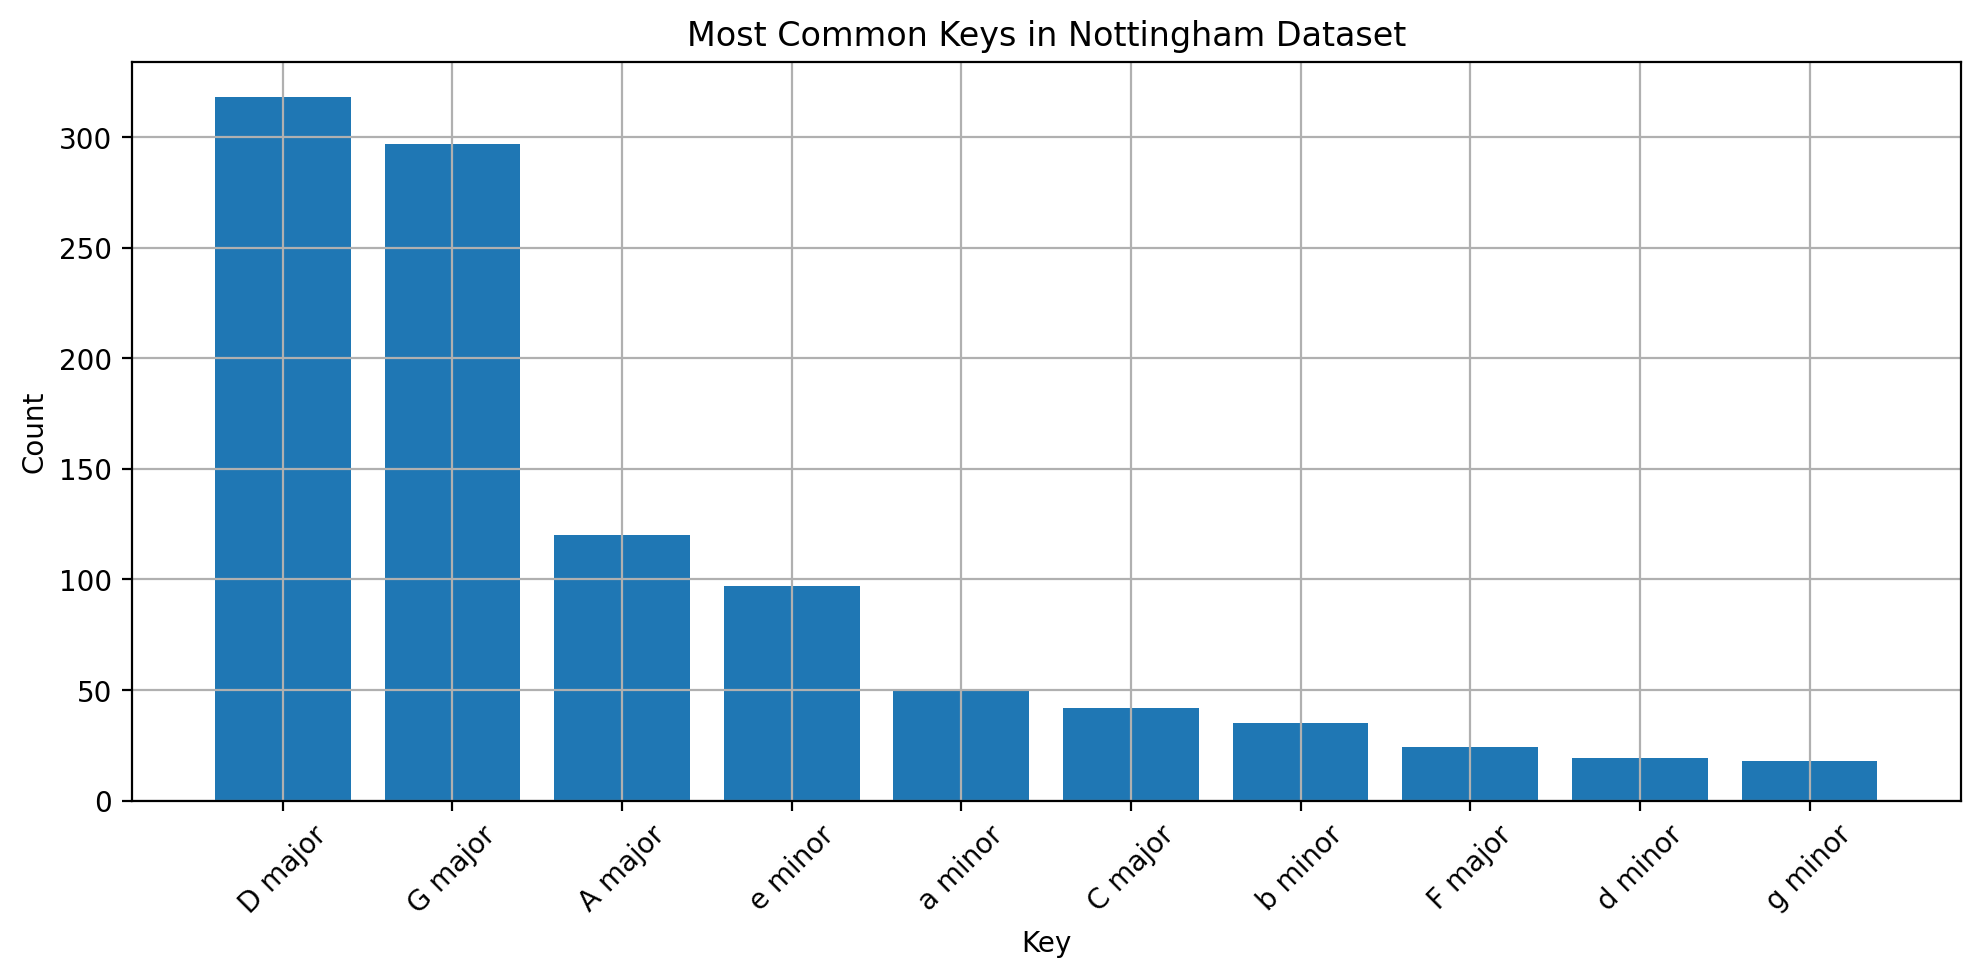

In [13]:
midi_dir = "MIDI/melody"  # Change this to your path
files = glob(os.path.join(midi_dir, "*.mid"))

print(f"Found {len(files)} jigs MIDI files.\n")

# Key and Time Signature Analysis
key_counts = analyze_keys(files)

print("Most Common Keys:")
for k, v in key_counts.most_common(5):
    print(f"  {k}: {v} files")

# Pitch Range
lowest, highest = analyze_pitch_range(files)
print(f"\n Pitch Range (MIDI): {lowest} to {highest}")

# Visualizations
plot_counter(key_counts, "Most Common Keys in Nottingham Dataset", "Key", "Count")

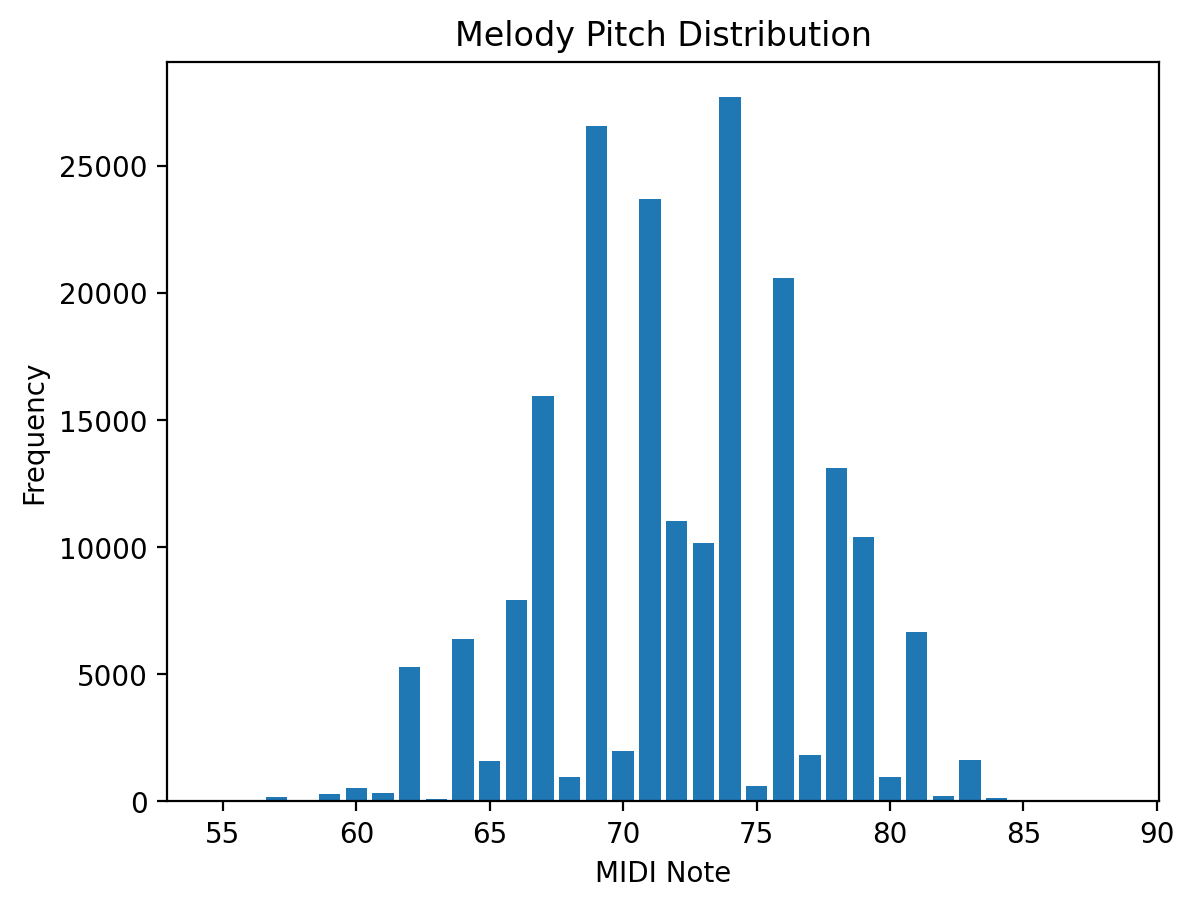

In [6]:
from collections import Counter

def note_distribution(folder):
    pitch_counter = Counter()
    for fname in os.listdir(folder):
        if not fname.endswith(".mid"): continue
        try:
            midi = MidiFile(os.path.join(folder, fname))
            for inst in midi.instruments:
                for note in inst.notes:
                    pitch_counter[note.pitch] += 1
        except Exception as e:
            print(f"Failed {fname}: {e}")
    return pitch_counter

melody_pitches = note_distribution("MIDI/melody")
chord_pitches = note_distribution("MIDI/chords")

plt.bar(melody_pitches.keys(), melody_pitches.values())
plt.title("Melody Pitch Distribution")
plt.xlabel("MIDI Note"); plt.ylabel("Frequency")
plt.show()


Found 1034 MIDI files.



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Category: ashover
  Most common keys:
    G major: 13
    D major: 10
    A major: 9
  Pitch Range (MIDI): 57 to 86

Category: hpps
  Most common keys:
    D major: 21
    G major: 20
    A major: 10
  Pitch Range (MIDI): 57 to 83

Category: jigs
  Most common keys:
    D major: 97
    G major: 94
    A major: 40
  Pitch Range (MIDI): 55 to 86

Category: morris
  Most common keys:
    G major: 17
    D major: 4
    g minor: 3
  Pitch Range (MIDI): 60 to 84

Category: playford
  Most common keys:
    G major: 5
    D major: 3
    d minor: 3
  Pitch Range (MIDI): 60 to 83

Category: reelsa-c
  Most common keys:
    D major: 32
    G major: 22
    A major: 10
  Pitch Range (MIDI): 55 to 83

Category: reelsd-g
  Most common keys:
    D major: 30
    G major: 19
    e minor: 12
  Pitch Range (MIDI): 55 to 86

Category: reelsh-l
  Most common keys:
    G major: 27
    D major: 24
    A major: 12
  Pitch Range (MIDI): 55 to 88

Category: reelsm-q
  Most common keys:
    D major: 34
    G majo

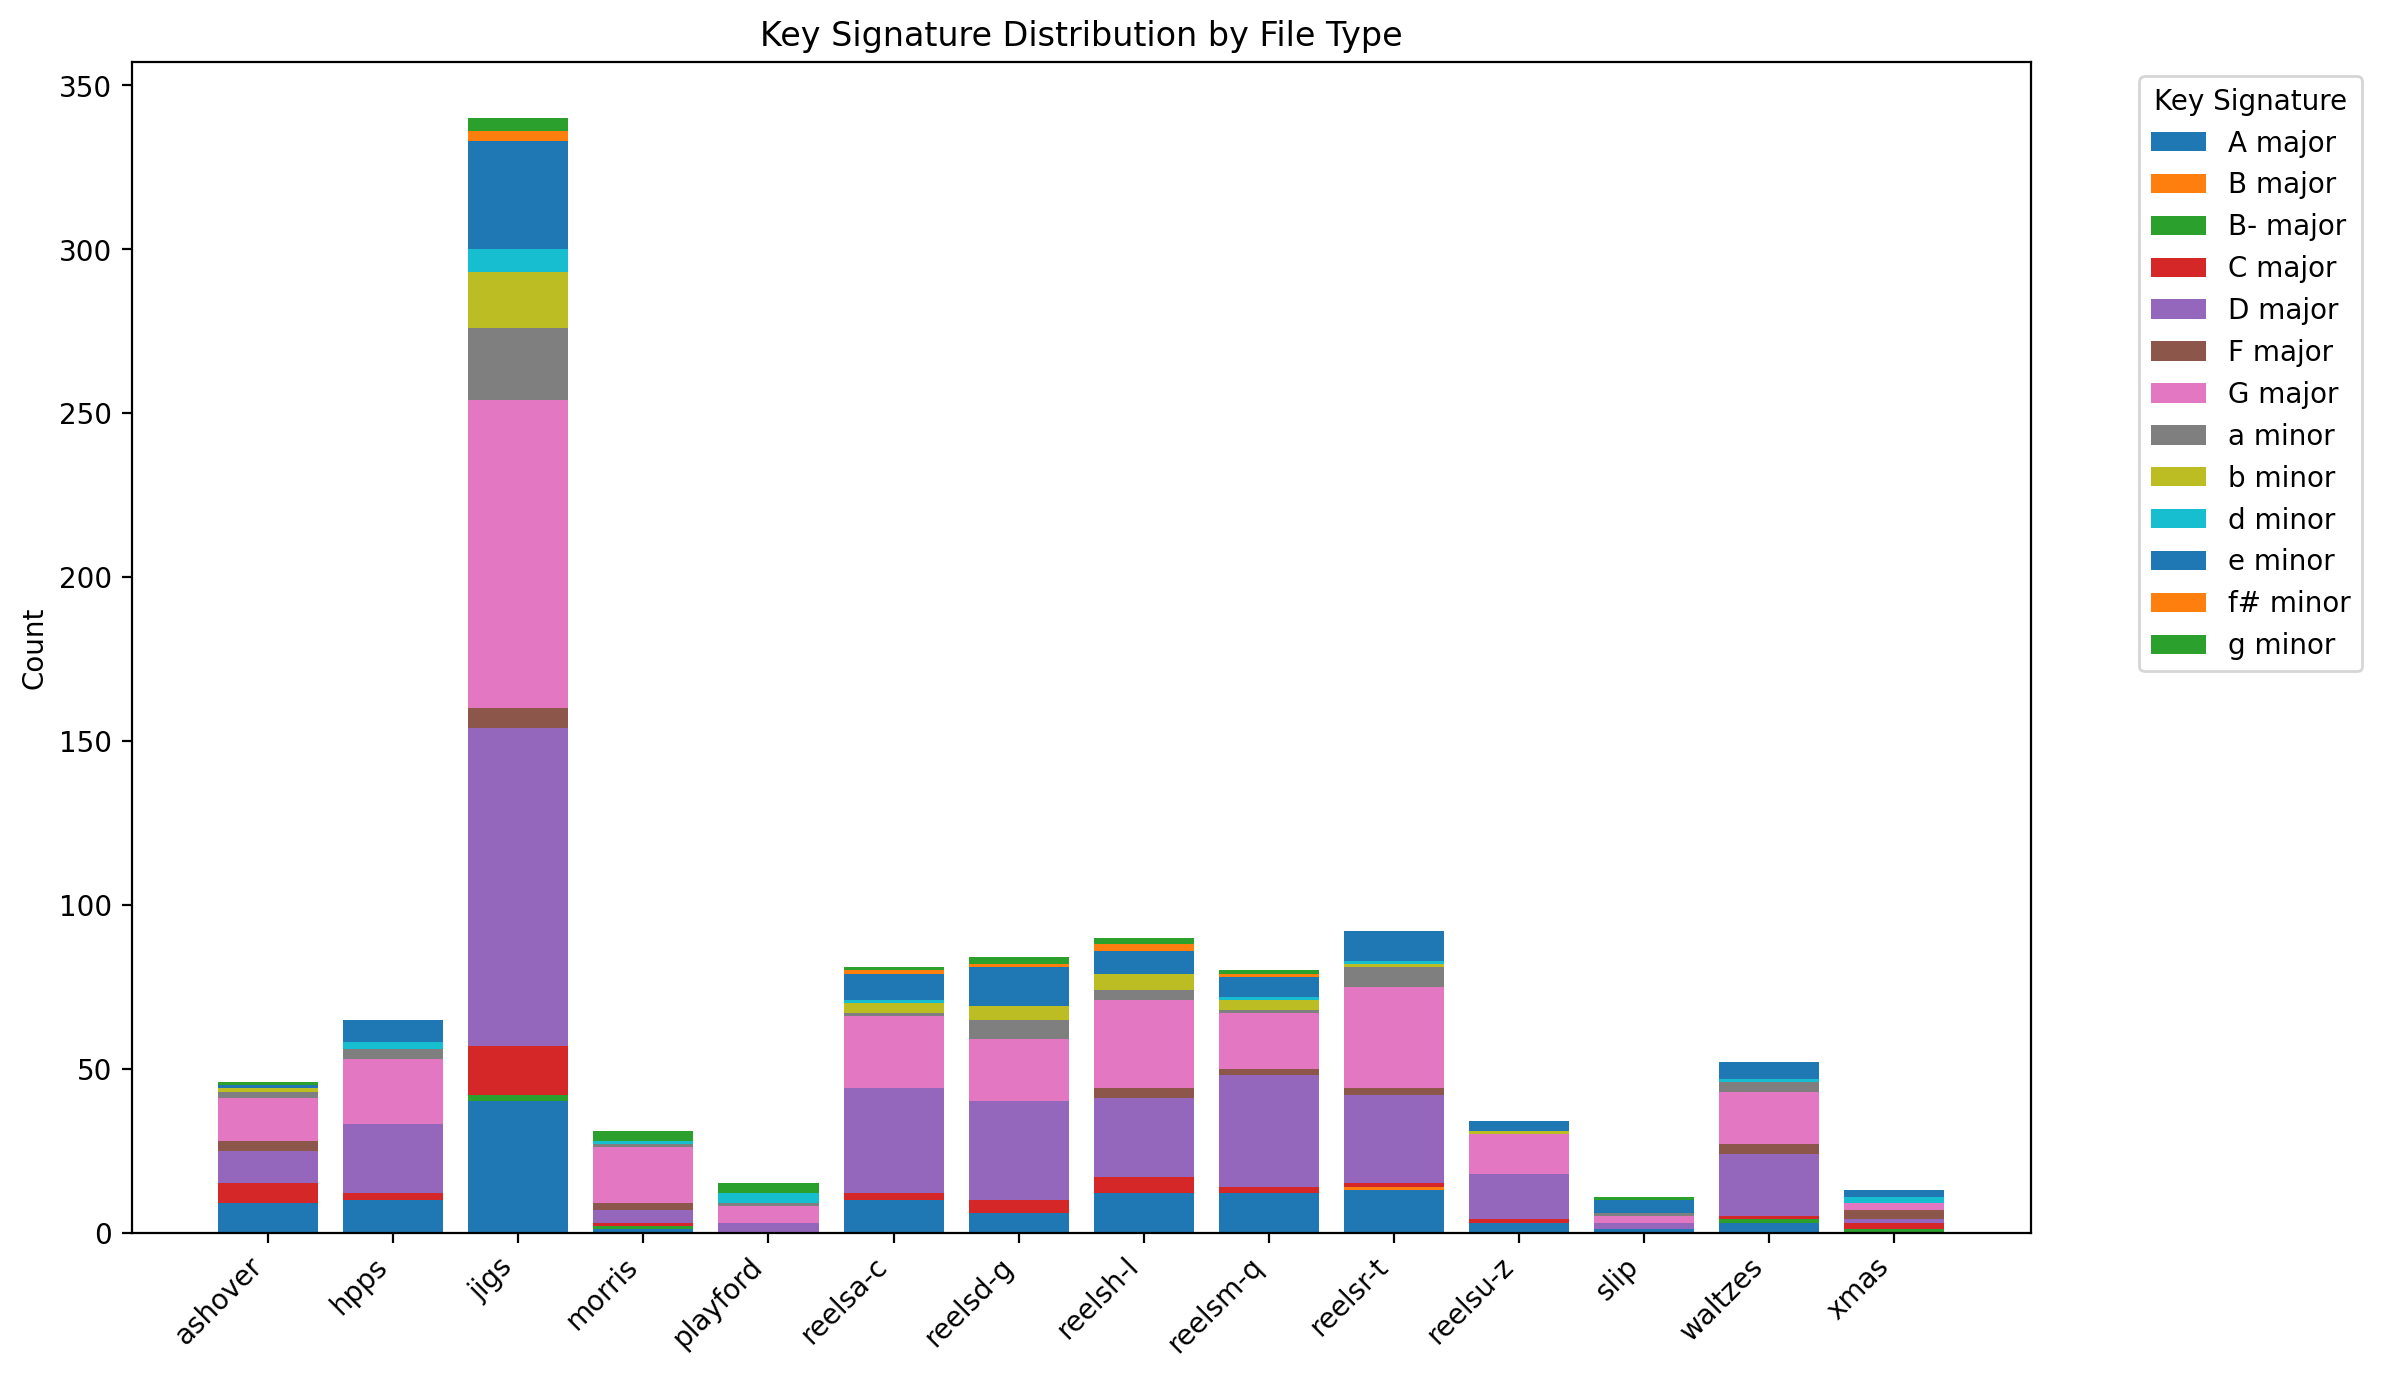

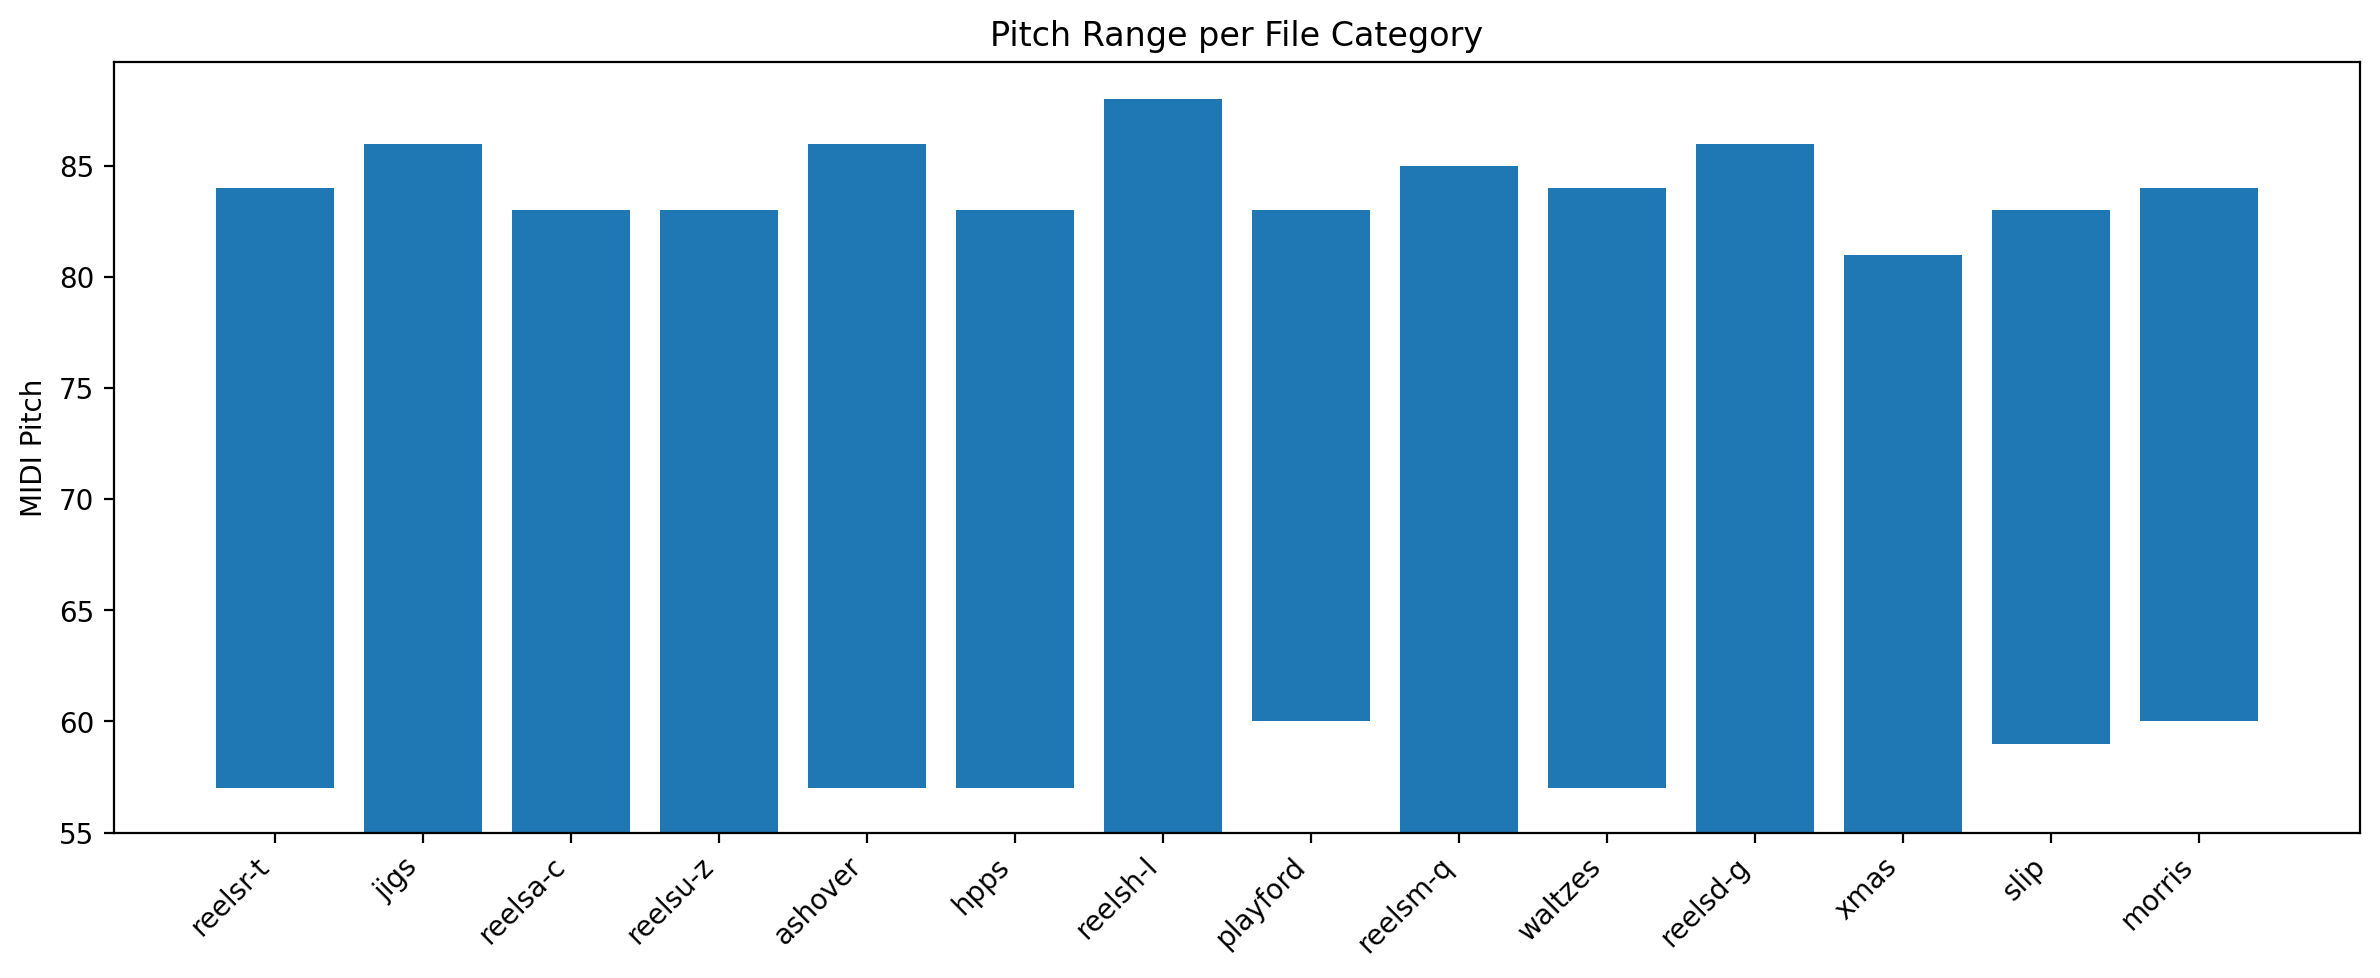

In [14]:
import os
from glob import glob
import music21
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# Utility: Extract file category from filename (e.g., jigs123.mid → jigs)
def get_category(filename):
    return os.path.basename(filename).split('.')[0].rstrip('0123456789')

# Analyze key signatures per category
def analyze_keys_by_category(files):
    category_keys = defaultdict(Counter)
    for f in files:
        try:
            score = music21.converter.parse(f)
            key = score.analyze('key')
            category = get_category(f)
            category_keys[category][str(key)] += 1
        except Exception as e:
            print(f"Error parsing {f}: {e}")
    return category_keys

# Analyze pitch range per category
def analyze_pitch_range_by_category(files):
    category_pitches = defaultdict(list)
    for f in files:
        try:
            score = music21.converter.parse(f)
            notes = score.flat.notes
            pitches = [n.pitch.midi for n in notes if isinstance(n, music21.note.Note)]
            category = get_category(f)
            category_pitches[category].extend(pitches)
        except Exception as e:
            print(f"Error parsing {f}: {e}")
    category_ranges = {
        cat: (min(p), max(p)) for cat, p in category_pitches.items() if p
    }
    return category_ranges

# Plot stacked bar chart of keys per category
def plot_key_distribution(category_keys):
    all_keys = sorted({k for keys in category_keys.values() for k in keys})
    categories = sorted(category_keys.keys())

    data = []
    for key in all_keys:
        row = [category_keys[cat].get(key, 0) for cat in categories]
        data.append(row)

    plt.figure(figsize=(12, 7))
    bottom = [0] * len(categories)
    for i, key in enumerate(all_keys):
        row = [category_keys[cat].get(key, 0) for cat in categories]
        plt.bar(categories, row, bottom=bottom, label=key)
        bottom = [b + r for b, r in zip(bottom, row)]

    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.title("Key Signature Distribution by File Type")
    plt.legend(title="Key Signature", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot pitch range per category
def plot_pitch_ranges(category_ranges):
    categories = list(category_ranges.keys())
    lows = [r[0] for r in category_ranges.values()]
    highs = [r[1] for r in category_ranges.values()]

    plt.figure(figsize=(12, 5))
    plt.bar(categories, [h - l for l, h in zip(lows, highs)], bottom=lows)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("MIDI Pitch")
    plt.title("Pitch Range per File Category")
    plt.tight_layout()
    plt.show()

# MAIN
midi_dir = "MIDI/melody"  # Change this if needed
files = glob(os.path.join(midi_dir, "*.mid"))

print(f"Found {len(files)} MIDI files.\n")

# Analyze
category_keys = analyze_keys_by_category(files)
category_ranges = analyze_pitch_range_by_category(files)

# Print summary
for cat in sorted(category_keys.keys()):
    print(f"Category: {cat}")
    print("  Most common keys:")
    for k, v in category_keys[cat].most_common(3):
        print(f"    {k}: {v}")
    if cat in category_ranges:
        low, high = category_ranges[cat]
        print(f"  Pitch Range (MIDI): {low} to {high}")
    print()

# Plot
plot_key_distribution(category_keys)
plot_pitch_ranges(category_ranges)
